In [ ]:
import sys
print(sys.version)

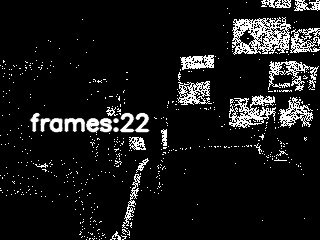

In [ ]:
import cv2
import numpy as np
from IPython import display
from PIL import Image
import time

def showVideo():
    try:
        cap = cv2.VideoCapture('nvarguscamerasrc ! video/x-raw(memory:NVMM), width=3280, height=2464, format=NV12,framerate=21/1 ! nvvidconv flip-method=0 ! video/x-raw, width=320, height=240, format=BGRx ! videoconvert ! video/x-raw,format=BGR ! appsink')
    except:
        print("Cannot Open Device")
    try:
        ret, frame = cap.read()
        
        fps = 0
    
        fps_out = 0

        tempo = 0 

        tempo_mais_um = 0
        
        while(ret==True):
            ret, frame = cap.read()
            
            if not ret:
                cap.release()
                print ("Released Video Resource")
                break
                
            _,ret_array = cv2.imencode('.jpg', frame)
            
            #cv2.imwrite("frame.jpg",frame) # save image
            
            #img_read_frame = cv2.imread("frame.jpg") # read image
            
            im_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)# (frame=BGR) to (hsv)
            
            mask_red = cv2.inRange(hsv,(0, 40, 100), (20, 180, 180)) # (hsv) to (frame=BGR)
            
             # fps count
            tempo = time.time()
            fps = fps + 1 
        
            if tempo >= tempo_mais_um:
                fps_out = fps
                fps = 0
                tempo_mais_um = tempo + 1
            
            #print("frames:"+str(fps_out))
            #image imputs: (frame), (img_read_frame), (masd_red)
            
            img_out = cv2.putText(mask_red,("frames:"+str(fps_out)),(30, 130),cv2.FONT_HERSHEY_SIMPLEX,0.75,(255, 255, 255),2, cv2.LINE_AA)
            
            _,img_out = cv2.imencode('.jpg', img_out)# convert to jpg
            
            i = display.Image(data=img_out)
            display.display(i)
            display.clear_output(wait=True)
            
    except KeyboardInterrupt:
        cap.release()
        print("Released Video Resource from KeyboardInterrupt")
        
showVideo()